Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BIKE DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


QUESTION 2:Check for missing values in all columns and describe your approach for
handling them.


In [5]:
print(df.isnull().sum())

# Handling missing values
df.ffill(inplace=True)  # Forward fill as a simple strategy

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    2
dtype: int64


/tmp/ipython-input-3930807437.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill as a simple strategy


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Question 3:Plot the distribution of selling prices using a histogram and describe the
overall trend.

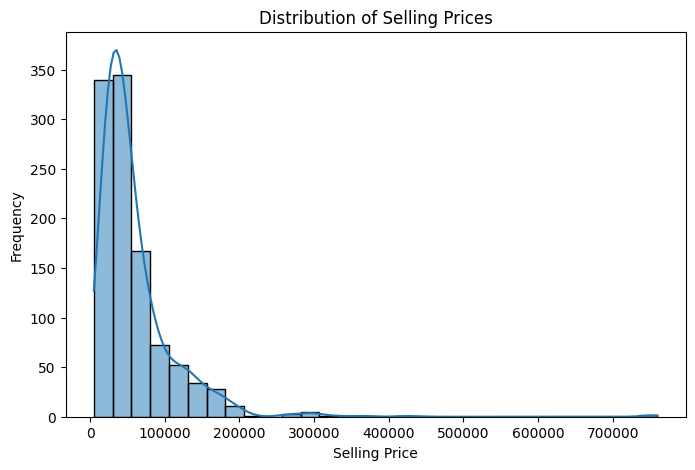

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

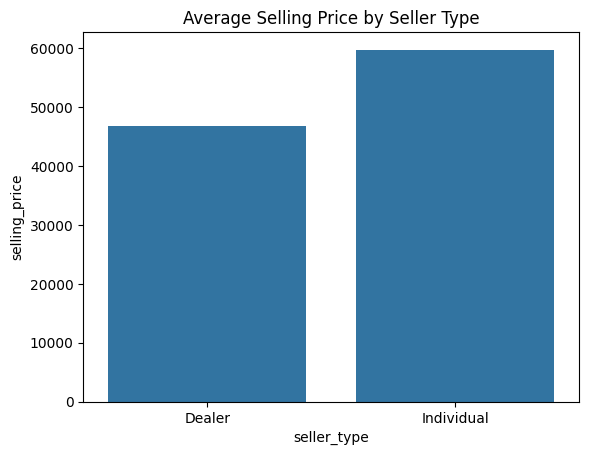

In [7]:
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

sns.barplot(x='seller_type', y='selling_price', data=avg_price)
plt.title("Average Selling Price by Seller Type")
plt.show()

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

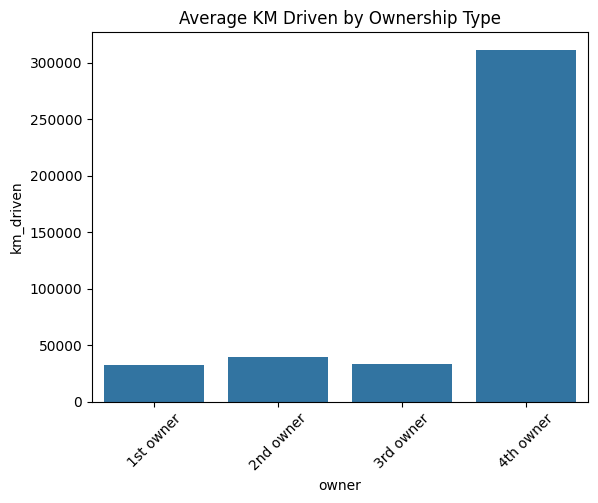

In [8]:
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

sns.barplot(x='owner', y='km_driven', data=avg_km)
plt.title("Average KM Driven by Ownership Type")
plt.xticks(rotation=45)
plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [9]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Filtering
filtered_df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

# Summary before and after
print("Before:\n", df['km_driven'].describe())
print("After:\n", filtered_df['km_driven'].describe())

Before:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

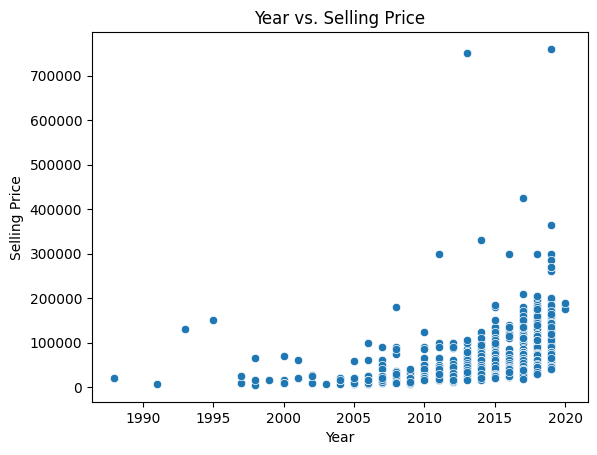

In [10]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

In [11]:
encoded_df = pd.get_dummies(df, columns=['seller_type'])
encoded_df.head(5)

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,89643.0,False,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

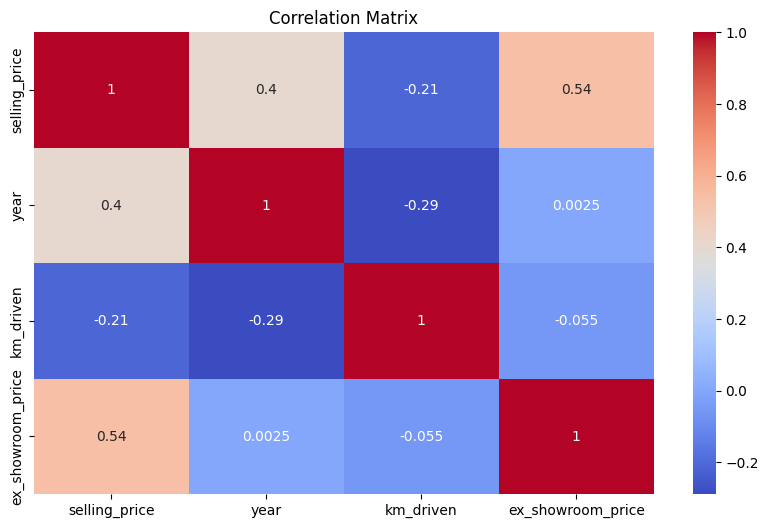

In [12]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.


The important Factors Affecting Selling Price:
- Year: Newer bikes are priced higher
- Ownership: First-owner bikes are more valuable
- Seller Type: Dealers list bikes at higher prices
Data Cleaning & Feature Engineering used:
- Handled missing values using forward fill
- Removed outliers using IQR
- One-hot encoded categorical variables
